<a href="https://colab.research.google.com/github/unknown-jun/NLP_study/blob/main/NLP_Book/B07_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리
## 자연어 처리 관련 용어
- **<span style="color: 2D3748; background-color:#fff5b1;">토큰(token)</span>**: 자연어 처리를 하기 위한 최소 단위, 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 하며, 문자열을 토큰으로 분리하는 함수를 토큰 함수라고 한다.
- **<span style="color: 2D3748; background-color:#fff5b1;">토큰화(tokenization)</span>**: 텍스트를 문장이나 단어로 분리하는 것을 의미함. 토큰화 단계를 마치면 텍스트가 단어 단위로 분리됨
- **<span style="color: 2D3748; background-color:#fff5b1;">불용어(stop words):</span>** 문장 내에서 많이 등장하는 단어. 분석과 관계없으며 자주 등장하는 빈도 때문에 성능에 영향을 미치므로 사전에 제거를 해야 함. 예로는 "a", "the", "she", "he"가 있다.
- **<span style="color: 2D3748; background-color:#fff5b1;">어간 추출(stemming):</span>** 단어를 기본형태로 만드는 작업. 예를 들어 "consign", "consigning", "consignment"가 있을 때 기본 단어인 "consign"으로 통일하는 것
- **<span style="color: 2D3748; background-color:#fff5b1;">표제어 추출(lemmatization):</span>** 단어가 문장 속에서 어떤 품사로 쓰이는 지를 고려하여 단어를 기본형태로 만드는 작업. 예를 들어 "am", "are", "is"는 "be"로 바뀐다.
- **<span style="color: 2D3748; background-color:#fff5b1;">품사 태깅(part-of-speech tagging):</span>** 주어진 문장에서 품사를 식별하기 위해 붙여주는 태그(식별 정보)


In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 문장 토큰화
import nltk

nltk.download('punkt')
text = nltk.word_tokenize('Is it possible distinguishing cats and dogs')
print(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Is', 'it', 'possible', 'distinguishing', 'cats', 'and', 'dogs']


In [3]:
# 태깅에 필요한 자원 내려 받기
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
# 품사 태깅
nltk.pos_tag(text)

[('Is', 'VBZ'),
 ('it', 'PRP'),
 ('possible', 'JJ'),
 ('distinguishing', 'VBG'),
 ('cats', 'NNS'),
 ('and', 'CC'),
 ('dogs', 'NNS')]

## 자연어 처리 과정
1. 인간의 언어인 자연어가 입력 텍스트로 들어옴
2. 입력 텍스트에 대한 전처리
  1. 토큰화
  2. 불용어 제거
  3. 어간 추출
  4. 정규화
3. 전처리가 끝난 단어들을 임베딩
4. 모델/모형 적용

### NLTK가 제공하는 주요 기능
- 말뭉치
- 토큰 생성
- 형태소 분석
- 품사 태깅

In [5]:
# nltk 라이브러리 호출 및 문장 정의
import nltk
nltk.download('punkt')
string1 = "my favorite subject is math"
string2 = "my favorite subject is math, english, economic and computer science"
nltk.word_tokenize(string1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['my', 'favorite', 'subject', 'is', 'math']

In [6]:
nltk.word_tokenize(string2)

['my',
 'favorite',
 'subject',
 'is',
 'math',
 ',',
 'english',
 ',',
 'economic',
 'and',
 'computer',
 'science']

### KoNLPy

In [ ]:
# 라이브러리 설치(코랩)

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [8]:
# 라이브러리 호출 및 문장을 형태소로 변환
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.morphs('딥러닝이 쉽나요? 어렵나요?')) # 텍스트를 형태소로 변환

['딥러닝이', '쉽', '나요', '?', '어렵', '나요', '?']


In [9]:
# 품사태깅
print(komoran.pos('소파 위에 있는 것이 고양이인가요? 강아지인가요?'))  # 품사 태깅

[('소파', 'NNP'), ('위', 'NNG'), ('에', 'JKB'), ('있', 'VV'), ('는', 'ETM'), ('것', 'NNB'), ('이', 'JKS'), ('고양이', 'NNG'), ('이', 'VCP'), ('ㄴ가요', 'EF'), ('?', 'SF'), ('강아지', 'NNG'), ('이', 'VCP'), ('ㄴ가요', 'EF'), ('?', 'SF')]


형태소:  
언어를 쪼갤 때 의미를 갖는 최소 단위.  
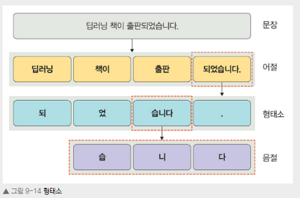

### scikit-learn이 제공하는 NLP 기능
- **<span style="color: 2D3748; background-color:#fff5b1;">CountVectorizer:</span>** 텍스트에서 단어의 등장 횟수를 기준으로 특성을 추출함
- **<span style="color: 2D3748; background-color:#fff5b1;">Tfidfvectorizer:</span>** TF-IDF 값을 사용하여 텍스트에서 특성을 추출함
- **<span style="color: 2D3748; background-color:#fff5b1;">HashingVectorizer:</span>** CountVectorizer와 방법이 동일하지만 텍스트를 추출할 때 해시 함수를 사용하기 때문에 실행 시간이 감소한다.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
import warnings
import numpy as np
warnings.filterwarnings('ignore')

x_data = np.array([
  'me free lottery',
  'free get free you',
  'you free scholarship',
  'free to contact me',
  'you won award',
  'you ticket lottery',
  'you ticket lottery',
  'you ticket lottery',
  'you ticket lottery',
  'you ticket lottery'
])
y_data = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
for i, document in enumerate(x_data):
  document = word_tokenize(document)
  clean_words = []
  for word in document:
    word = word.lower()
    if word not in stopwords.words('english'): # 불용어 제거
      stemmer = SnowballStemmer('english')
      word = stemmer.stem(word) # 어간 추출
      clean_words.append(word)
    document = ' '.join(clean_words)
    x_data[i] = document
  
x_data

array(['free lotteri', 'free get free', 'free scholarship',
       'free contact', 'award', 'ticket lotteri', 'ticket lotteri',
       'ticket lotteri', 'ticket lotteri', 'ticket lotteri'], dtype='<U20')

In [12]:
vectorizer = CountVectorizer()

vectorizer.fit(x_data)
print(vectorizer.get_feature_names())
print(vectorizer.vocabulary_)

['award', 'contact', 'free', 'get', 'lotteri', 'scholarship', 'ticket']
{'free': 2, 'lotteri': 4, 'get': 3, 'scholarship': 5, 'contact': 1, 'award': 0, 'ticket': 6}


In [13]:
x_data = vectorizer.transform(x_data)
print(x_data.shape)
print(x_data)

(10, 7)
  (0, 2)	1
  (0, 4)	1
  (1, 2)	2
  (1, 3)	1
  (2, 2)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (5, 4)	1
  (5, 6)	1
  (6, 4)	1
  (6, 6)	1
  (7, 4)	1
  (7, 6)	1
  (8, 4)	1
  (8, 6)	1
  (9, 4)	1
  (9, 6)	1


In [14]:
print(x_data.toarray())

[[0 0 1 0 1 0 0]
 [0 0 2 1 0 0 0]
 [0 0 1 0 0 1 0]
 [0 1 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]]


### 토큰화
**<span style="color: 2D3748; background-color:#fff5b1;">토큰화</span>**란 주어진 텍스트를 단어/문장 단위로 자르는 것을 의미. 따라서 토큰화는 문장 토큰화와 단어 토큰화로 구분된다. 
- **<span style="color: 2D3748; background-color:#fff5b1;">문장 토큰화</span>**: 주어진 문장을 토큰화한다는 것은 마침표(,), 느낌표(!), 물음표(?) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것

In [15]:
# 문장 토큰화
from nltk import sent_tokenize

text_sample = 'Natural Language Processing, or NLP, is the process of extracting the meaning, or intent, behind human language. In the field of Conversational artificial intelligence (AI), NLP allows machines and applications to understand the intent of human language inputs, and then generate appropriate responses, resulting in a natural conversation flow.'

tokenized_sentences = sent_tokenize(text_sample)
tokenized_sentences

['Natural Language Processing, or NLP, is the process of extracting the meaning, or intent, behind human language.',
 'In the field of Conversational artificial intelligence (AI), NLP allows machines and applications to understand the intent of human language inputs, and then generate appropriate responses, resulting in a natural conversation flow.']

- **<span style="color: 2D3748; background-color:#fff5b1;">단어 토큰화</span>**: 단어 토큰화는 띄어쓰기를 기준으로 문장을 구분한다.  
하지만 한국어는 띄어쓰기만으로 토큰을 구분하기 어려운 단점이 있다.

In [16]:
# 단어 토큰화
from nltk import word_tokenize

sentence = "This book is for deep learning learners"
words = word_tokenize(sentence)
print(words)

['This', 'book', 'is', 'for', 'deep', 'learning', 'learners']


In [17]:
# 아포스트로피가 포함된 문장에서 단어 토큰화
from nltk.tokenize import WordPunctTokenizer

sentence = "it's nothing that you don't already know except most people aren't aware of how their inner world works"
words = WordPunctTokenizer().tokenize(sentence)
print(words)

['it', "'", 's', 'nothing', 'that', 'you', 'don', "'", 't', 'already', 'know', 'except', 'most', 'people', 'aren', "'", 't', 'aware', 'of', 'how', 'their', 'inner', 'world', 'works']


### 한글 토큰화 예제

In [18]:
!wget https://raw.githubusercontent.com/gilbutITbook/080289/main/chap09/data/ratings_train.txt

--2022-06-26 08:38:53--  https://raw.githubusercontent.com/gilbutITbook/080289/main/chap09/data/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628806 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.08s   

2022-06-26 08:38:53 (179 MB/s) - ‘ratings_train.txt’ saved [14628806/14628806]



In [19]:
# 라이브러리 호출 및 데이터셋 준비
import csv
from konlpy.tag import Okt
from gensim.models import word2vec

f = open(r'/content/ratings_train.txt', 'r', encoding='utf-8')
rdr = csv.reader(f, delimiter='\t')
rdw = list(rdr)
f.close()

In [20]:
# 오픈소스 한글 형태소 분석기 호출
twitter = Okt()

result = []
break_num = 0
for line in rdw:    # 텍스트를 한 줄씩 처리
  malist = twitter.pos(line[1], norm=True, stem=True)  # 형태소 분석
  r = []
  for word in malist:
    if not word[1] in ["Josa", 'Eomi', 'Punctuation']: # 조사, 어미, 문장 부호는 제외하고 처리
      r.append(word[0])
  rl = (' '.join(r)).strip()  # 형태소 사이에 " "(공백)을 넣고, 양쪽 공백은 삭제
  result.append(rl)
  
  break_num += 1
  if break_num <= 10:
    print(rl)

document
아 더빙 진짜 짜증나다 목소리
흠 포스터 보고 초딩 영화 줄 오버 연기 가볍다 않다
너 무재 밓었 다그 래서 보다 추천 다
교도소 이야기 구먼 솔직하다 재미 없다 평점 조정
사이 몬페 그 의 익살스럽다 연기 돋보이다 영화 스파이더맨 늙다 보이다 하다 커스틴 던스트 너무나도 이쁘다 보이다
막 걸음 마 떼다 3 세 초등학교 1 학년 생인 8 살다 영화 ㅋㅋㅋ 별 반개 아깝다 움
원작 긴장감 제대로 살리다 하다
별 반개 아깝다 욕 나오다 이응경 길용우 연 기 생활 몇 년 정말 발 해도 그것 낫다 납치 감금 반복 반복 이 드라마 가족 없다 연기 못 하다 사람 모 엿 네
액션 없다 재미 있다 몇 안되다 영화


In [21]:
# 형태소 저장
with open("NaverMovie.nlp", 'w', encoding='utf-8') as fp:
  fp.write('\n'.join(result))

In [22]:
# word2vec 모델 생성
mData = word2vec.LineSentence("NaverMovie.nlp")
mModel = word2vec.Word2Vec(mData, size= 200, window=10, hs=1, min_count=2, sg=1)
mModel.save('NaverMovie.model')  # 모델 저장

### 불용어 제거
- 불용어 제거란 문장 내에서 빈번하게 발생하여 의미를 부여하기 어려운 단어들을 의미한다.
- 예를 들어 'a', 'the'와 같은 단어들은 모든 구문에 매우 많이 등장히기 때문에 아무런 의미를 가지지 않는다.
- 특히 불용어는 자연어 처리에 있어 효율성을 감소시키고 처리 시간이 길어지는 단점이 있기 때문에 반드시 제거가 필요하다.

In [22]:
# 불용어 처리
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

sample_text = "One of the first things that we ask ourselves is what are the pros and cons of any task we perform"
text_tokens = word_tokenize(sample_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]

print('불용어 제거 미적용: ', text_tokens, '\n')
print('불용어 제거 적용: ', tokens_without_sw)

### 어간 추출
- 어간 추출(stemming)과 표제어 추출(lemmatization)은 단어의 원형을 찾아주는 것
- **<span style="color: 2D3748; background-color:#fff5b1;">어간 추출(stemming)</span>**은 단어 그 자체만 고려하기 때문에 품사가 달라도 사용이 가능
- 반면 **<span style="color: 2D3748; background-color:#fff5b1;">표제어 추출(lemmatization)</span>**은 단어가 문장 속에서 어떤 품사로 쓰였는지 고려하기 때문에 품사가 같아야 사용이 가능하다.

  - 어간 추출의 예:  
  Automates, automatic, automation → automat
  - 표제어 추출의 예:  
  am, are, is → be  
  car, cars, car's, cars' → car

- 어간 추출과 표제어 추출 모두 어근 추출이 목적이지만, 어간 추출은 사전에 없어도 추출할 수 있고 표제어 추출은 사전에 있는 단어만 추출할 수 있다는 차이점이 있다.
- NLTK의 어간 추출에는 <span style="color: 2D3748; background-color:#fff5b1;">포터(porter)</span>와 <span style="color: 2D3748; background-color:#fff5b1;">랭커스터(lancaster)</span> 알고리즘이 있다.

In [25]:
# 포터 알고리즘
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('obsses'), stemmer.stem('obssesed'))
print(stemmer.stem('standardizes'), stemmer.stem('standardization'))
print(stemmer.stem('national'), stemmer.stem('nation'))
print(stemmer.stem('absentness'), stemmer.stem('abscently'))
print(stemmer.stem('tribalical'), stemmer.stem('tribalicalized'))  # 사전에 없는 단어

obss obsses
standard standard
nation nation
absent abscent
tribal tribalic


In [26]:
# 랭커스터 알고리즘
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()
print(stemmer.stem('obsses'), stemmer.stem('obssesed'))
print(stemmer.stem('standardizes'), stemmer.stem('standardization'))
print(stemmer.stem('national'), stemmer.stem('nation'))
print(stemmer.stem('absentness'), stemmer.stem('abscently'))
print(stemmer.stem('tribalical'), stemmer.stem('tribalicalized'))  # 사전에 없는 단어

obss obsses
standard standard
nat nat
abs absc
trib trib


- 랭커스터 알고리즘은 단어의 원형을 알아볼 수 없을 정도로 축소시키기 때문에 정확도가 낮다.
- 따라서 일반적인 상황보다는 데이터셋을 축소시켜야 하는 특정한 상황에서나 유용하다.

### 표제어 추출
- 일반적으로 어간 추출보다는 표제어 추출의 성능이 더 좋다.
- 품사와 같은 문법 뿐만 아니라 문장 내에서 단어의 의미도 고려하기 때문에 성능이 더 좋다.
- 하지만 어간 추출보다 시간이 더 걸리는 단점이 존재한다.
- 표제어 추출에는 `WordNetLemmatizer`를 주로 이용함

In [35]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [36]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
print(lemma.lemmatize('obsses'), lemma.lemmatize('obssesed'))
print(lemma.lemmatize('standardizes'), lemma.lemmatize('standardization'))
print(lemma.lemmatize('national'), lemma.lemmatize('nation'))
print(lemma.lemmatize('absentness'), lemma.lemmatize('abscently'))
print(lemma.lemmatize('tribalical'), lemma.lemmatize('tribalicalized'))  # 사전에 없는 단어

ob obssesed
standardizes standardization
national nation
absentness abscently
tribalical tribalicalized


- 일반적으로 표제어 추출의 성능을 높이고자 단어에 대한 품사 정보를 추가한다.
- 다음과 같이 두번째 파라미터에 품사 정보를 넣어주면 정확하게 어근 단어를 추출할 수 있다.

In [37]:
print(lemma.lemmatize('obsses', 'v'), lemma.lemmatize('obssesed', 'a'))
print(lemma.lemmatize('standardizes', 'v'), lemma.lemmatize('standardization', 'n'))
print(lemma.lemmatize('national', 'a'), lemma.lemmatize('nation', 'n'))
print(lemma.lemmatize('absentness', 'n'), lemma.lemmatize('abscently', 'r'))
print(lemma.lemmatize('tribalical', 'a'), lemma.lemmatize('tribalicalized', 'v'))  # 사전에 없는 단어

obsses obssesed
standardize standardization
national nation
absentness abscently
tribalical tribalicalized


### 정규화
- 데이터셋이 가진 특성(혹은 컬럼)의 모든 데이터가 동일한 정도의 범위를 갖도록 하는 것이 정규화
- 예를 들어 a라는 컬럼은 0\~10000의 범위를 갖지만, b라는 컬럼은 0\~5의 범위를 가진다고 가정하자
- 이 경우 a의 값이 상당히 큰 값을 가지기 때문에 상대적으로 더 많은 영향을 끼치게 된다.
- 하지만 값이 크다고 분석에 더 중요한 요소라고 간주할 수 없기 때문에 정규화가 필요하다.

In [77]:
# 라이브러리 호출
import pandas as pd
import torch
import torch.nn as nn

from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [78]:
# 데이터셋 경로 지정 및 훈련과 테스트 용도로 분리
df = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080289/main/chap09/data/diabetes.csv')
X = df[df.columns[:-1]]
y = df['Outcome']

X = X.values
y = torch.tensor(y.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=7)

In [79]:
# 훈련과 테스트용 데이터를 정규화
ms = MinMaxScaler()
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train = ms.fit_transform(y_train)
y_test = ms.transform(y_test)

In [80]:
# 커스텀 데이터셋 생성
class customdataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.len = len(self.X)
  
  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

In [81]:
# 데이터로더에 데이터 담기
train_data = customdataset(torch.FloatTensor(X_train), 
                           torch.FloatTensor(y_train))
test_data = customdataset(torch.FloatTensor(X_test),
                          torch.FloatTensor(y_test))

train_loader = DataLoader(dataset= train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size=64, shuffle=True)

In [82]:
# 네트워크 생성
class binaryClassification(nn.Module):

  def __init__(self):
    super(binaryClassification, self).__init__()
    self.layer_1 = nn.Linear(8, 64, bias=True)
    self.layer_2 = nn.Linear(64, 64, bias=True)
    self.layer_out = nn.Linear(64, 1, bias=True)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.1)
    self.batchnorm1 = nn.BatchNorm1d(64)
    self.batchnorm2 = nn.BatchNorm1d(64)

  def forward(self, inputs):
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.dropout(x)
    x = self.layer_out(x)
    return x

In [83]:
# 손실함수와 옵티마이저 지정
epochs = 1000+1
print_epoch = 100
learning_rate = 1e-2

model = binaryClassification()
model.to(device)
BCE = nn.BCEWithLogitsLoss()
# 훈련 데이터셋에서 무작위로 샘플을 추출하고 그 샘플만 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [84]:
# 모델 성능 측정 함수 정의
def accuracy(y_pred, y_test):
  y_pred_tag = torch.round(torch.sigmoid(y_pred))
  correct_results_sum = (y_pred_tag == y_test).sum().float()  
  acc = correct_results_sum / y_test.shape[0]
  acc = torch.round(acc * 100)

  return acc

In [85]:
# 모델 학습
for epoch in range(epochs):
  iteration_loss = 0.
  iteration_accuracy =  0.

  model.train()
  for i, data in enumerate(train_loader):   # 데이터로더에서 훈련 데이터셋을 배치 크기만큼 불러옴
    X, y = data
    X, y = X.to(device), y.to(device)

    y_pred = model(X.float()).to(device)      # 독립변수를 모델에 적용하여 훈련
    loss = BCE(y_pred, y.reshape(-1, 1).float())  # 모델에 적용하여 훈련시킨 결과와 정답(레이블)를 손실함수에 적용
    iteration_loss += loss
    iteration_accuracy += accuracy(y_pred, y)     # 모델 성능(정확도)을 변수에 누적하여 저장
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if (epoch % print_epoch == 0):
    print('Train - epoch: {0} - loss: {1:.5f} - acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))

  iteration_loss = 0.
  iteration_accuracy = 0.

  model.eval()
  for i, data in enumerate(test_loader):
    X, y = data
    X, y = X.to(device), y.to(device)

    y_pred = model(X.float()).to(device)
    loss = BCE(y_pred, y.reshape(-1, 1).float())
    iteration_loss += loss
    iteration_accuracy += accuracy(y_pred, y)
  
  if (epoch % print_epoch == 0):
    print('Test  - epoch: {0} - loss: {1:.5f} - acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))

Train - epoch: 0 - loss: 0.69076 - acc: 56.222
Test  - epoch: 0 - loss: 0.67458 - acc: 68.750
Train - epoch: 100 - loss: 0.42152 - acc: 80.556
Test  - epoch: 100 - loss: 0.51042 - acc: 76.250
Train - epoch: 200 - loss: 0.32916 - acc: 85.222
Test  - epoch: 200 - loss: 0.47916 - acc: 76.750
Train - epoch: 300 - loss: 0.36154 - acc: 85.000
Test  - epoch: 300 - loss: 0.52812 - acc: 75.750
Train - epoch: 400 - loss: 0.40219 - acc: 78.222
Test  - epoch: 400 - loss: 0.50922 - acc: 76.250
Train - epoch: 500 - loss: 0.46114 - acc: 78.778
Test  - epoch: 500 - loss: 0.51781 - acc: 74.000
Train - epoch: 600 - loss: 0.52162 - acc: 74.222
Test  - epoch: 600 - loss: 0.51885 - acc: 76.500
Train - epoch: 700 - loss: 0.46994 - acc: 74.111
Test  - epoch: 700 - loss: 0.49341 - acc: 77.500
Train - epoch: 800 - loss: 0.47316 - acc: 81.667
Test  - epoch: 800 - loss: 0.49696 - acc: 76.500
Train - epoch: 900 - loss: 0.48032 - acc: 77.667
Test  - epoch: 900 - loss: 0.51370 - acc: 74.000
Train - epoch: 1000 - lo